In [23]:
import pandas as pd
import numpy as np
import nltk.corpus
from nltk import SnowballStemmer
from nltk.tokenize import word_tokenize

import string
from wordcloud import WordCloud

from matplotlib.colors import ListedColormap
import matplotlib.pyplot  as plt

from unidecode import unidecode

from collections import Counter


import os, sys, re

In [2]:
data = pd.read_csv('data/harvard_general.csv', encoding='utf-8')
data.columns = map(str.lower, data.columns)

In [3]:
data_eng = data[data['lang'] == "en"]

In [4]:
tweets = data_eng['text'].tolist()
tweets[0:10]

['@magninano China with the aid of RNA vaccine producers, Harvard, Fauci, Collins, NIH, and quite a few others.',
 "@Truth_Abides There's a lot of dots to connect, but the story is there and it predates the release of covid-19. Its is something I have tried to convey since March, but has fallen on deaf ears. Another string of articles. https://t.co/tVpqQjLSlD",
 '@mattdeter @cletusyeetus1 @CowgirlWarrior @IvyShoots @murmalerm @bobx_akins Harvard didn’t write that nonsense, rape apologist',
 '@mattdeter @CowgirlWarrior @cletusyeetus1 @IvyShoots @murmalerm @bobx_akins Reardon didn’t graduate from Harvard lmfaoooo',
 'Yes! @NicoleFleetwoo2 Nicole Fleetwood’s\xa0Marking Time: Art in the Age of Mass Incarceration\xa0(Harvard University Press, 2020) https://t.co/Reae0aQ8AL',
 'Woke up at 3 a.m. this morning to join Harvard Graduate School of Education webinar. https://t.co/8QJ9oiXhYP',
 '“If the identity and collective strength and resilience of students of color and their historical traumas

In [5]:
## clean text
def removeWords(listOfTokens, listOfWords):
    return [token for token in listOfTokens if token not in listOfWords]
def applyStemming(listOfTokens, stemmer):
    return [stemmer.stem(token) for token in listOfTokens]
def twoLetters(listOfTokens):
    twoLetterWord = []
    for token in listOfTokens:
        if len(token) <= 2 or len(token) >= 21:
            twoLetterWord.append(token)
    return twoLetterWord

In [29]:
def decontracted(phrase):
    # specific
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

def processTweets(tweets, language, heavy = True):
    tokenizedTweets = []
    stopwords = nltk.corpus.stopwords.words(language)
    gist_file = open("more_stopwords", "r")

    try:
        content = gist_file.read()
        otherwords = content.split(",")
    finally:
        gist_file.close()

    param_stemmer = SnowballStemmer(language)

    for i in range(len(tweets)):
        tweets[i] = tweets[i].replace(u'\ufffd', '8')
        tweets[i] = tweets[i].rstrip('\n')
        tweets[i] = tweets[i].casefold()

        tweets[i] = re.sub(r'http\S+', '', tweets[i])   
        tweets[i] = re.sub(r'www\S+', '', tweets[i])  
        tweets[i] = re.sub("\S*\d\S*", " ", tweets[i])
        tweets[i] = re.sub("\S*@\S*\s?"," ", tweets[i])
        tweets[i] = re.sub("(?!')[\W_]", ' ', tweets[i])
        tweets[i] = decontracted(tweets[i])

        listOfTokens = word_tokenize(tweets[i])
        tweets[i] = " ".join(listOfTokens)

        if heavy:
            tweets[i] = tweets[i].replace("harvard university", "")
            tweets[i] = tweets[i].replace("harvard business school", "hbs business")
            tweets[i] = tweets[i].replace("harvard college", "hcollege")
            tweets[i] = tweets[i].replace("harvard division continuing education", "hdce")
            tweets[i] = tweets[i].replace("harvard school dental medicine", "hsdm")
            tweets[i] = tweets[i].replace("harvard faculty arts sciences", "hfas")
            tweets[i] = tweets[i].replace("harvard graduate school education", "hgse education")
            tweets[i] = tweets[i].replace("harvard graduate school arts sciences", "hgsas")
            tweets[i] = tweets[i].replace("harvard kennedy school", "hks")
            tweets[i] = tweets[i].replace("harvard law school", "hls law")
            tweets[i] = tweets[i].replace("harvard medical school", "hms medical")
            tweets[i] = tweets[i].replace("school public health", "public health")
            tweets[i] = tweets[i].replace("harvard", "")

        listOfTokens = word_tokenize(tweets[i])
        twoLetterWord = twoLetters(listOfTokens)

        listOfTokens = removeWords(listOfTokens, stopwords)
        listOfTokens = removeWords(listOfTokens, twoLetterWord)
        if heavy: 
            listOfTokens = removeWords(listOfTokens, otherwords)
            listOfTokens = applyStemming(listOfTokens, param_stemmer)
        tokenizedTweets.append(listOfTokens)

        tweets[i] = " ".join(listOfTokens)
        tweets[i] = unidecode(tweets[i])
    return tokenizedTweets


In [30]:
twclean = tweets.copy()
tokenizedTweets = processTweets(twclean, 'english')

twclean2 = tweets.copy()
tokenizedTweets_light = processTweets(twclean2, 'english', False)

data_eng['processed_text'] = twclean

data_eng_slim = data_eng[data_eng['processed_text'] != ""]

tokenizedTweets_slim = list(filter(lambda x: len(x) != 0, tokenizedTweets))

freq = Counter()
i = 0
for tweet in tokenizedTweets_slim:
    for word in tweet:
        i += 1
        freq[word] += 1

print(len(twclean_slim))

7318
7318


In [10]:
# colors
monochrome_colors = ['#251616', '#760000', '#C63F3F', '#E28073', '#F1D3CF']
primary_colors = ['#C63F3F', '#F4B436', '#83BFCC', '#455574', '#E2DDDB']

m = ListedColormap(primary_colors)

In [33]:
text = " ".join(twclean2)

In [24]:
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off")
    plt.show()

In [34]:
wc_pre = WordCloud(width = 3000, height = 2000, random_state = 1, background_color="white", colormap=m, collocations=False).generate(text)

In [36]:
wc_pre.to_file('img-final/pre-trim.png')

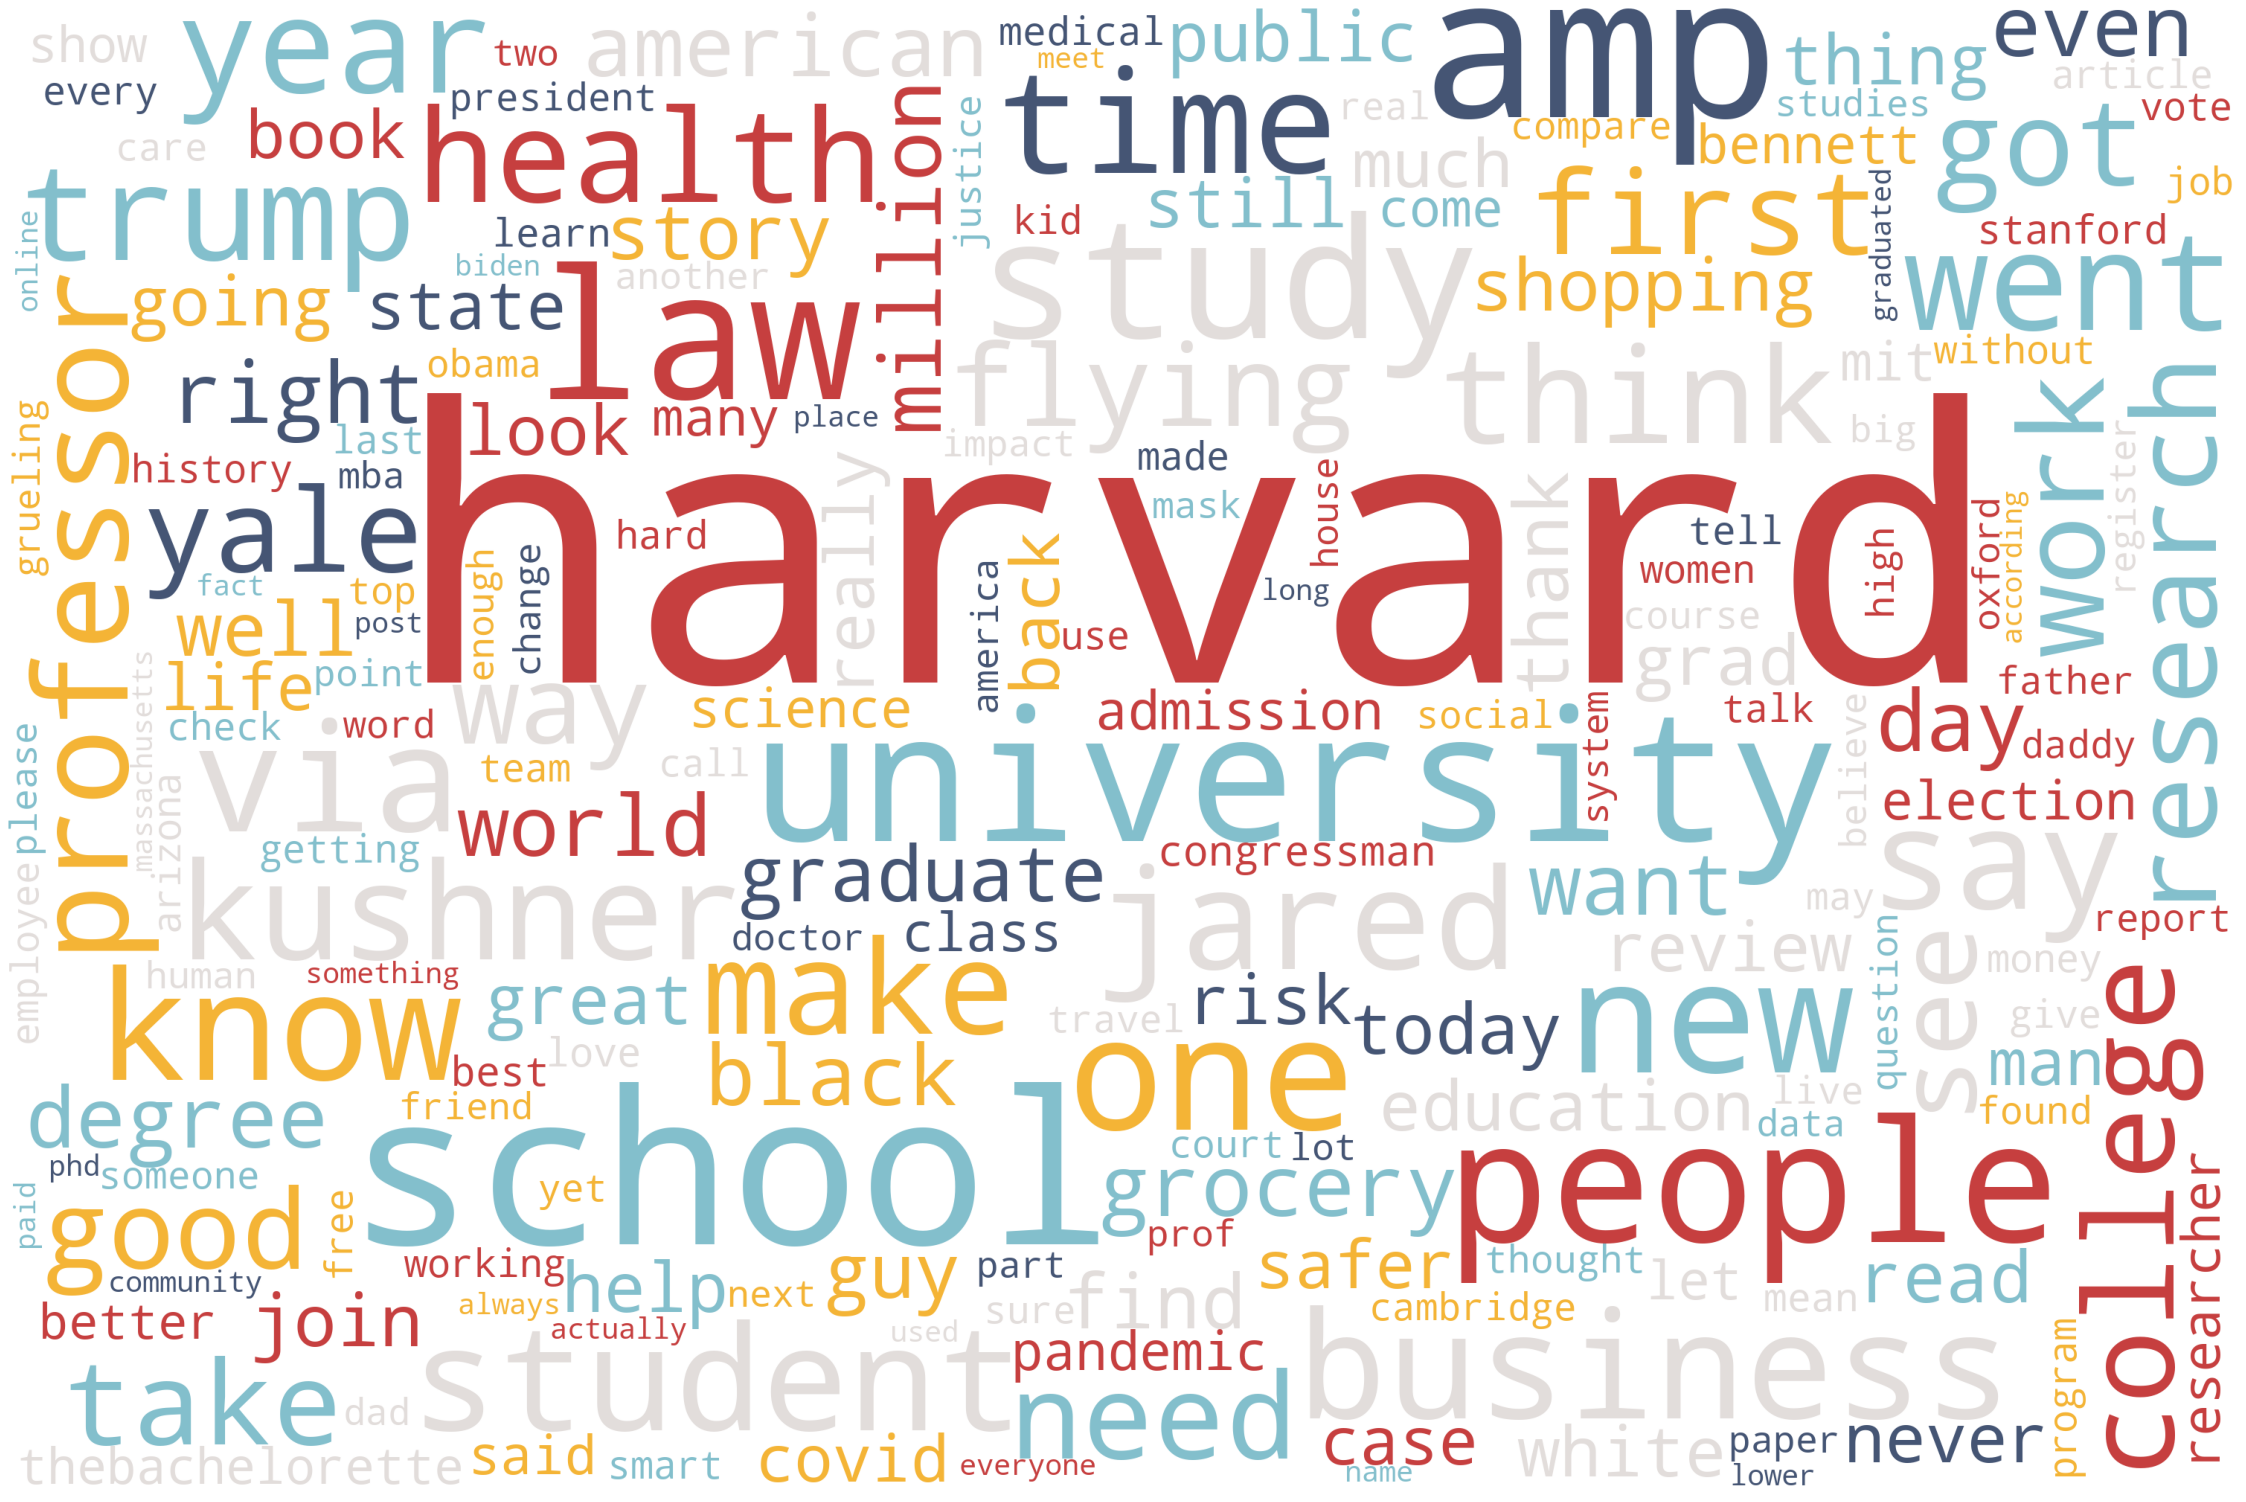

In [35]:
plot_cloud(wc_pre)

In [39]:
wc_processed = WordCloud(width = 3000, height = 2000, random_state=1, background_color="white", colormap=m, collocations=False).generate_from_frequencies(freq)


In [40]:
wc_processed.to_file('img-final/post-trim.png')

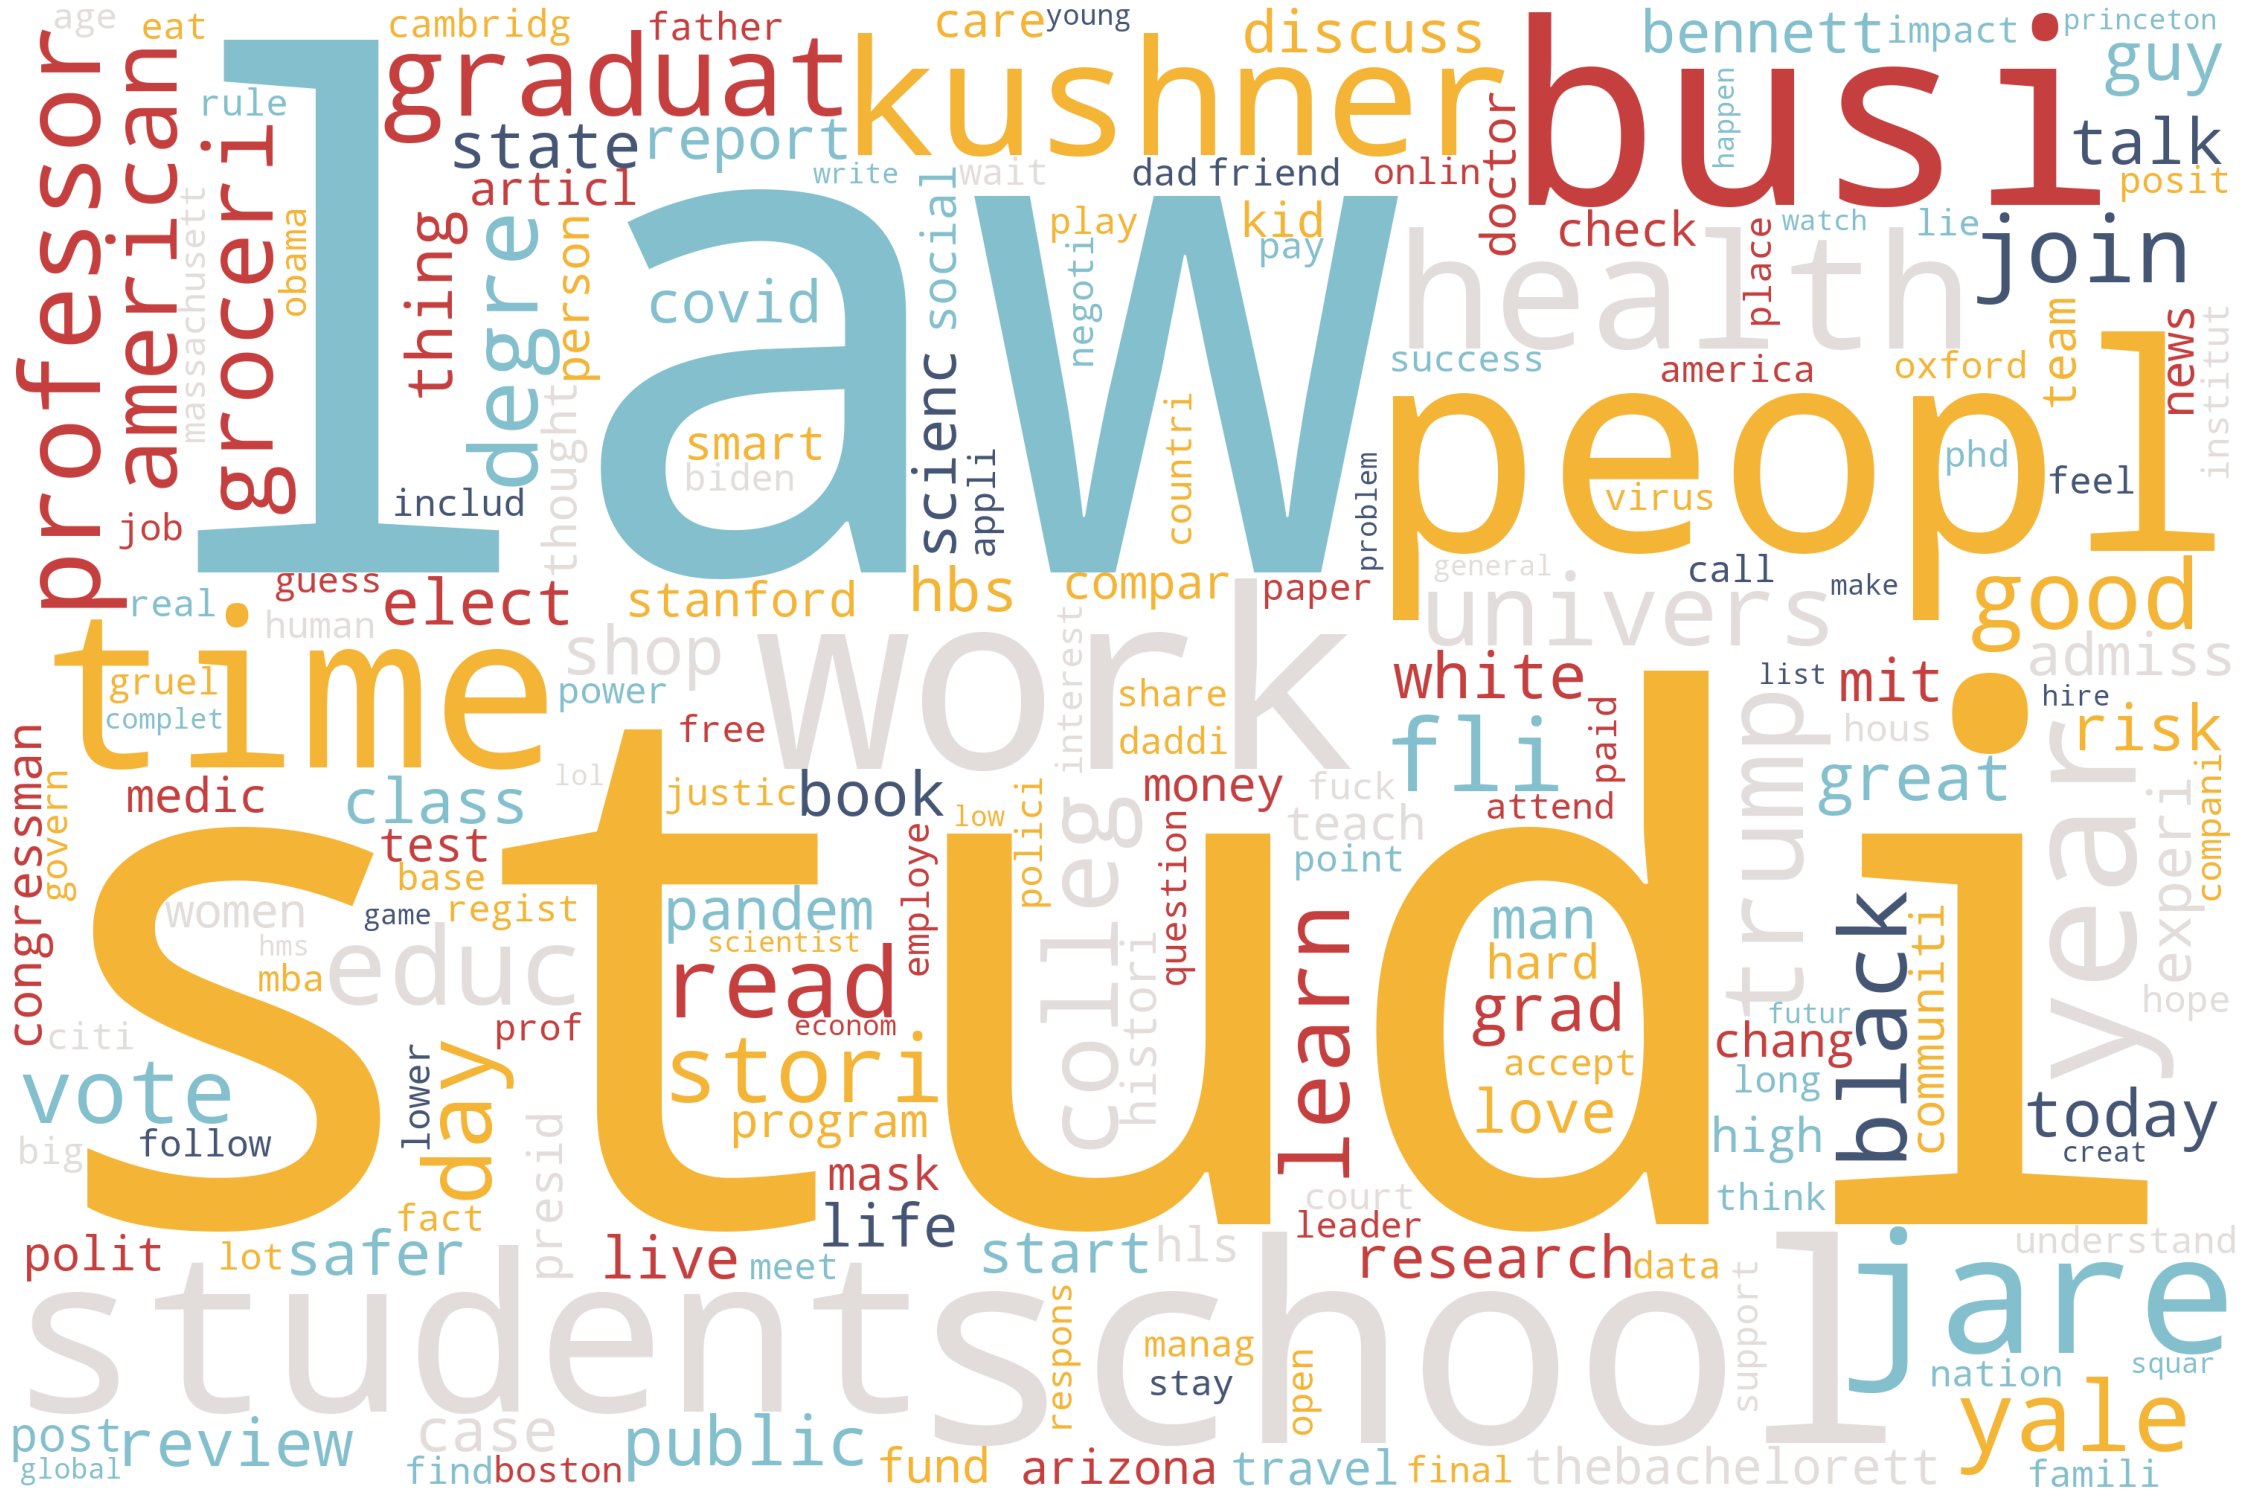

In [42]:
plot_cloud(wc_processed)